<a href="https://colab.research.google.com/github/carlos-souza-blip/Dados-hospitalares/blob/main/Reg_Log_e_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banco de Dados


In [1]:
# importando Bibliotecas
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot
from math import sqrt

In [3]:
# Dados de 2017 (RMHP)
df = pd.read_csv('https://raw.githubusercontent.com/carlos-souza-blip/Dados-hospitalares/main/rmhp_selecao_2017_GO.csv', sep= ",")
df.head(5)

,cnes,sexo,idade,diag_princ,dias_perm,ano,fxidade,cid50,permanencia,uso_uti,obito,icc,ieh
0,2338262,3,28,A049,5,2017,1,0,2,0,0,0,0
1,2338262,1,38,F130,13,2017,1,0,4,1,1,0,0
2,2338262,1,86,I743,10,2017,5,0,3,0,0,0,0
3,2338262,3,60,K297,10,2017,3,0,3,0,0,0,0
4,2338262,1,37,K810,2,2017,1,0,2,0,0,0,0


# Curva ROC
Encontrando o melhor modelo dentro dos parâmentros da curva ROC, com a finalidade de executar a regressão logística.

In [4]:
modelo_0 = roc_auc_score(df.obito, df.sexo + df.fxidade)
print('Modelo 0 AUC: %0.2f' % modelo_0)
modelo_1 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50)
print('Modelo 1 AUC: %0.2f' % modelo_1)
modelo_2 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh)
print('Modelo 2 AUC: %0.2f' % modelo_2)
modelo_3 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc)
print('Modelo 3 AUC: %0.2f' % modelo_3)
modelo_4 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia)
print('Modelo 4 AUC: %0.2f' % modelo_4)
modelo_5 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia + df.uso_uti)
print('Modelo 5 AUC: %0.2f' % modelo_5)
modelo_6 = roc_auc_score(df.obito, df.fxidade + df.cid50 + df.icc + df.ieh + df.permanencia + df.uso_uti)
print('Modelo 6 AUC: %0.2f' % modelo_6)

Modelo 0 AUC: 0.69
Modelo 1 AUC: 0.72
Modelo 2 AUC: 0.72
Modelo 3 AUC: 0.75
Modelo 4 AUC: 0.73
Modelo 5 AUC: 0.76
Modelo 6 AUC: 0.78


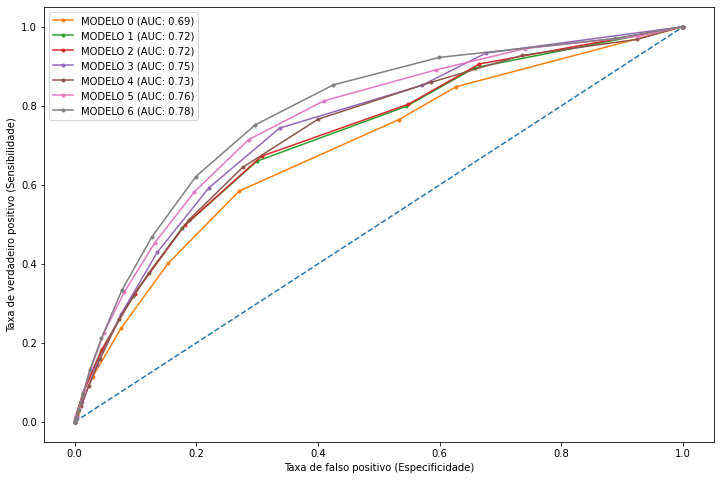

In [6]:
# Plotar gráfico
aleatorio = [0 for _ in range(len(df.obito))]
h_fpr, h_tpr, _ = roc_curve(df.obito, aleatorio)

a_fpr, a_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade)
b_fpr, b_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50)
c_fpr, c_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh)
d_fpr, d_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc)
e_fpr, e_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia)
f_fpr, f_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia + df.uso_uti)
g_fpr, g_tpr, _ = roc_curve(df.obito, df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia + df.uso_uti)

pyplot.plot(h_fpr, h_tpr, linestyle='--', label='' )

pyplot.plot(a_fpr, a_tpr, marker='.', label='MODELO 0 (AUC: %0.2f)' % modelo_0)
pyplot.plot(b_fpr, b_tpr, marker='.', label='MODELO 1 (AUC: %0.2f)' % modelo_1)
pyplot.plot(c_fpr, c_tpr, marker='.', label='MODELO 2 (AUC: %0.2f)' % modelo_2)
pyplot.plot(d_fpr, d_tpr, marker='.', label='MODELO 3 (AUC: %0.2f)' % modelo_3)
pyplot.plot(e_fpr, e_tpr, marker='.', label='MODELO 4 (AUC: %0.2f)' % modelo_4)
pyplot.plot(f_fpr, f_tpr, marker='.', label='MODELO 5 (AUC: %0.2f)' % modelo_5)
pyplot.plot(g_fpr, g_tpr, marker='.', label='MODELO 6 (AUC: %0.2f)' % modelo_6)

pyplot.xlabel('Taxa de falso positivo (Especificidade)')
pyplot.ylabel('Taxa de verdadeiro positivo (Sensibilidade)')
pyplot.legend()
pyplot.rcParams['figure.figsize'] = [12, 8]

pyplot.show()

In [8]:
# Organizando as variáveis conforme o modelo 6
dados = df[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
dados.head(5)

,fxidade,cid50,ieh,icc,permanencia,uso_uti
0,1,0,0,0,2,0
1,1,0,0,0,4,1
2,5,0,0,0,3,0
3,3,0,0,0,3,0
4,1,0,0,0,2,0


# Regressão Logística

In [9]:
# Separando os Dados para teste e treino
# Iremos trabalhar com os dados de treino para verificar o modelo de regressão com 0,7% dos dados separados
y = df.obito
X = pd.get_dummies(df[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 0)

In [10]:
# verificando a separação
y_train.value_counts()

0    30549
1     2269
Name: obito, dtype: int64

In [12]:
reg_logistica = LogisticRegression()
reg_logistica.fit(X_train, y_train)
y_predict = reg_logistica.predict(X_train)

In [13]:
# obtendo os resultados da regressão
print('Coeficientes:', reg_logistica.coef_)
print('Intercepto: %0.2f' %reg_logistica.intercept_)
print('R-squared: %0.2f' %reg_logistica.score(X_train, y_train))
print('Acurácia: %0.2f' %accuracy_score(y_train, reg_logistica.predict(X_train)))
print('Erro: %0.2f' %sqrt(mean_squared_error(y_train, y_predict)))

Coeficientes: [[ 0.43108668  0.99443297  0.35787999  0.23032749 -0.11664137  2.38558383]]
Intercepto: -4.46
R-squared: 0.93
Acurácia: 0.93
Erro: 0.26


## Métrica de Validação


In [14]:
print(classification_report(y_train, reg_logistica.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     30549
           1       0.49      0.17      0.25      2269

    accuracy                           0.93     32818
   macro avg       0.72      0.58      0.61     32818
weighted avg       0.91      0.93      0.91     32818



In [15]:
# Matriz de confusão
confusion_matrix = pd.crosstab(y_train, y_predict, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,30155,394
1,1884,385


In [16]:
# Obtendo cada probabilidade predita
obito_esp = reg_logistica.predict_proba(X_train)[:,1]
obito_esp

array([0.06362471, 0.43353212, 0.0169076 , ..., 0.01561012, 0.01391543,
       0.01561012])

### Curva Roc

Depois da validação dos dados 

In [17]:
# Intervalo de Confiança - Curva ROC
def intervalo_conf_ROC(y_true, y_score):
    curva_roc = roc_auc_score(y_true, y_score)
    qtd = sum(y_true == 1)
    qtd_ = sum(y_true == 0)
    x = curva_roc / (2 - curva_roc)
    y = 2*curva_roc**2 / (1 + curva_roc)
    RQ = sqrt((curva_roc*(1 - curva_roc) + (qtd - 1)*(x - curva_roc**2) + (qtd_ - 1)*(y - curva_roc**2)) / (qtd*qtd_))
    lower = curva_roc - 1.96*RQ
    upper = curva_roc + 1.96*RQ

    return (lower, upper)
intervalo_conf_ROC(y_train, obito_esp)

(0.8686928003398354, 0.8872686393234347)

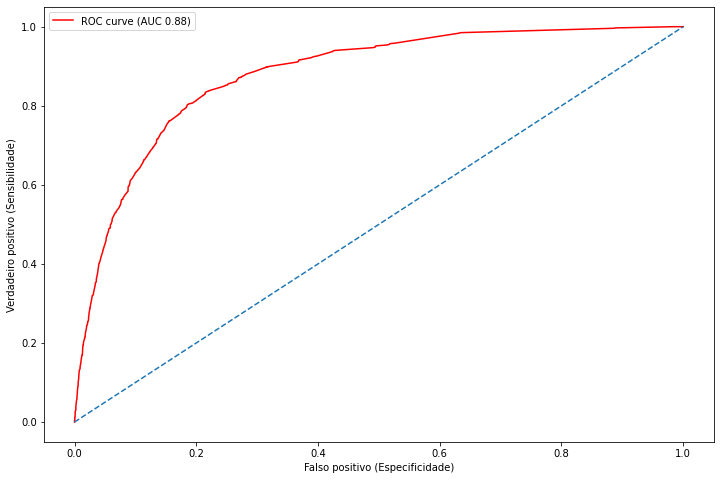

In [18]:
def pyplot_plot(y_true, y_score):
  fpr, tpr, _ = roc_curve(y_true, y_score)
  pyplot.rcParams['figure.figsize'] = [11, 7]
  curve = roc_auc_score(y_true, y_score)
  pyplot.plot(fpr, tpr, color='red', label='ROC curve (AUC %0.2f)' % curve)
  pyplot.plot(h_fpr, h_tpr, linestyle='--', label='' )
  pyplot.xlabel('Falso positivo (Especificidade)') 
  pyplot.ylabel('Verdadeiro positivo (Sensibilidade)')
  pyplot.legend()
  pyplot.show()

pyplot.savefig('Curve_ROC', format = 'jpeg')

pyplot_plot(y_train, obito_esp)

# Testando o modelo para o banco de dados inteiro

In [19]:
# óbitos observados (óbito = 1 e não óbito = 0)
df['obito'].value_counts()

0    43651
1     3233
Name: obito, dtype: int64

In [20]:
dados_1 = reg_logistica.predict_proba(dados)[:,1]
print('Somatório dos óbitos esperados %0.0f' % dados_1.sum())

Somatório dos óbitos esperados 3220
